In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1204,2020-08-04,United Kingdom,305680.0,305623.0,46321.0,46210.0,57.0,111.0
1205,2020-08-04,Germany,210731.0,211281.0,9155.0,9156.0,-550.0,-1.0
1206,2020-08-04,Iran,312999.0,312035.0,17404.0,17405.0,964.0,-1.0
1207,2020-08-04,Turkey,233784.0,233851.0,5745.0,5747.0,-67.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  4040.3821339950373
RMSE =  13245.268923915139


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  292.3647642679901
RMSE =  691.0148534647069


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  23146.48275862069
RMSE =  39400.76075276404
-- World performances for deaths --
MAE =  1583.5086206896551
RMSE =  1922.5483514838068


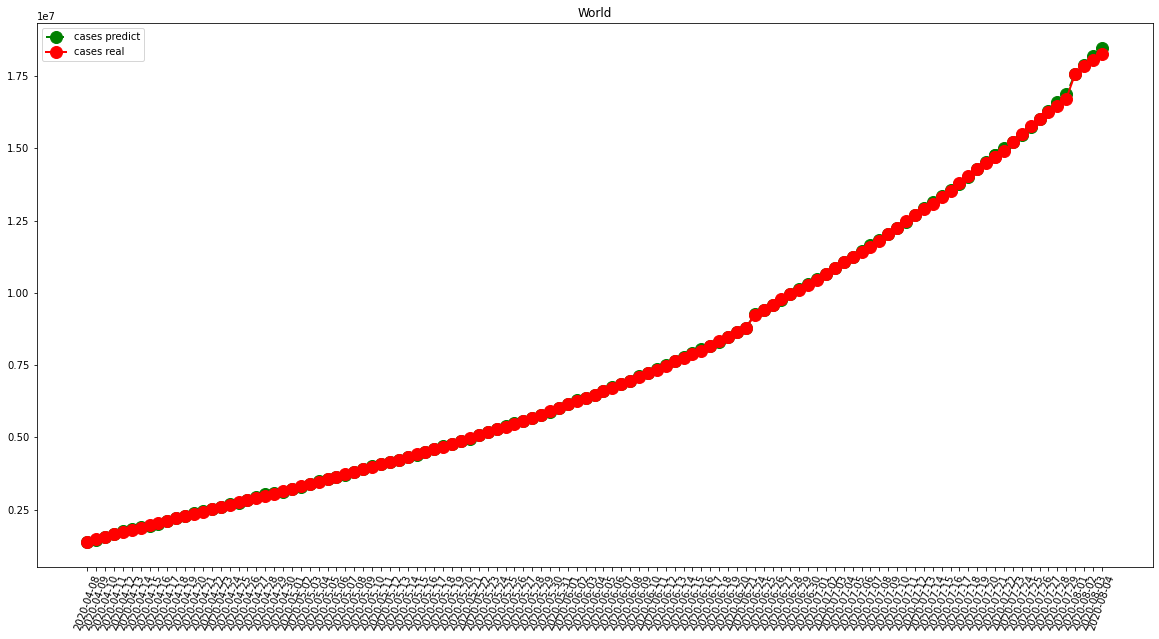

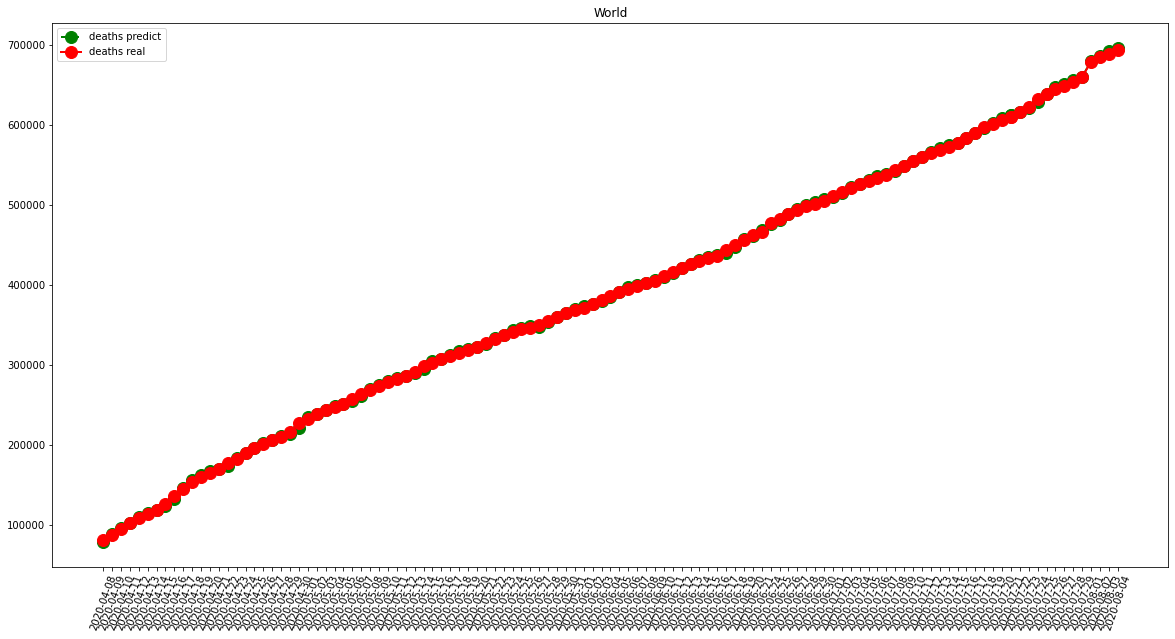

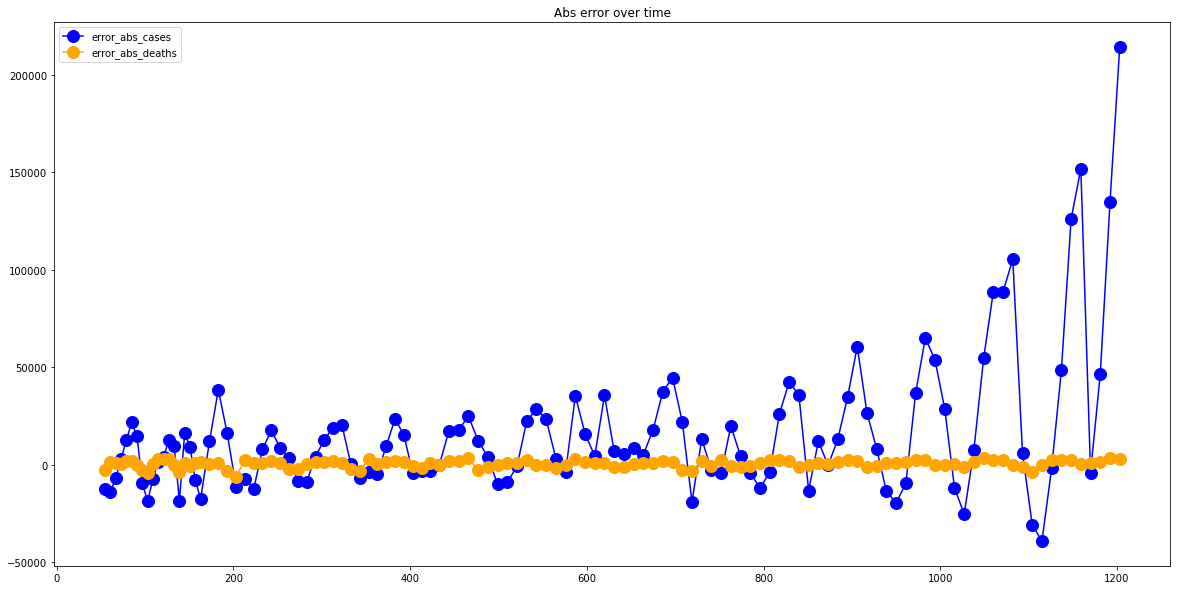

In [7]:
visShow("World")

-- France performances for cases --
MAE =  872.7777777777778
RMSE =  1388.149922144293
-- France performances for deaths --
MAE =  143.85714285714286
RMSE =  298.6102997404998


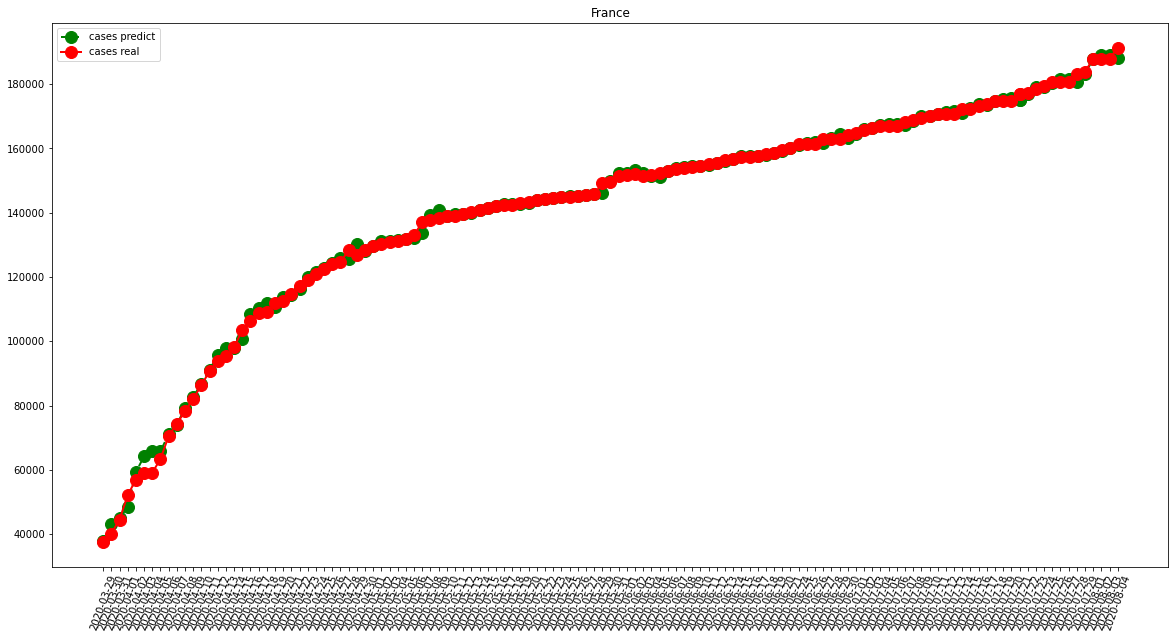

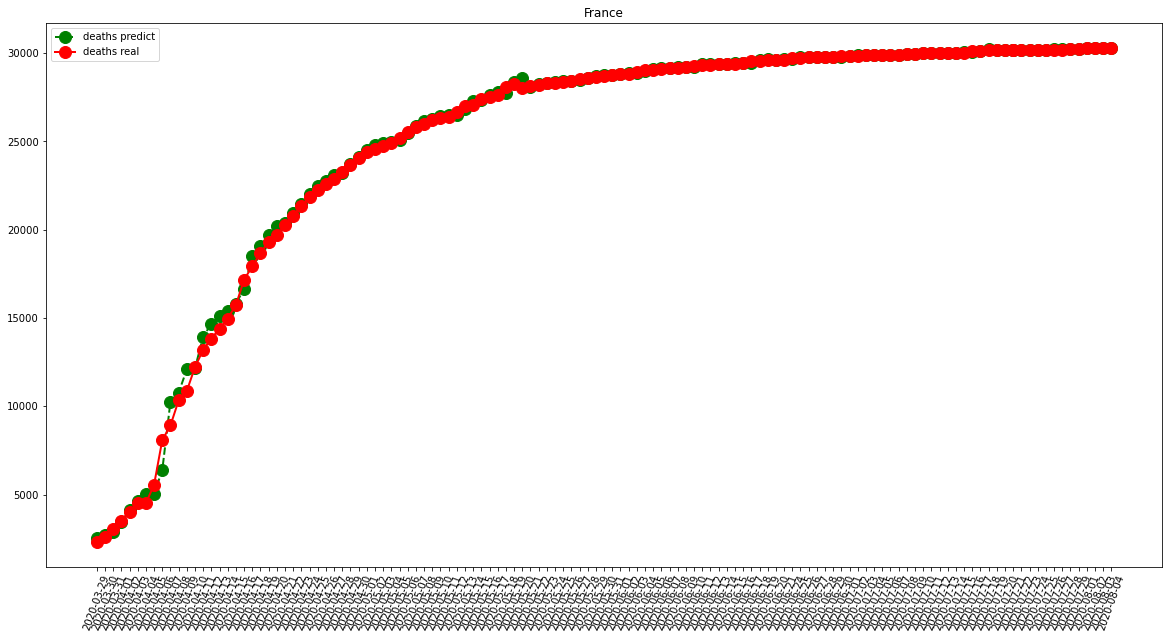

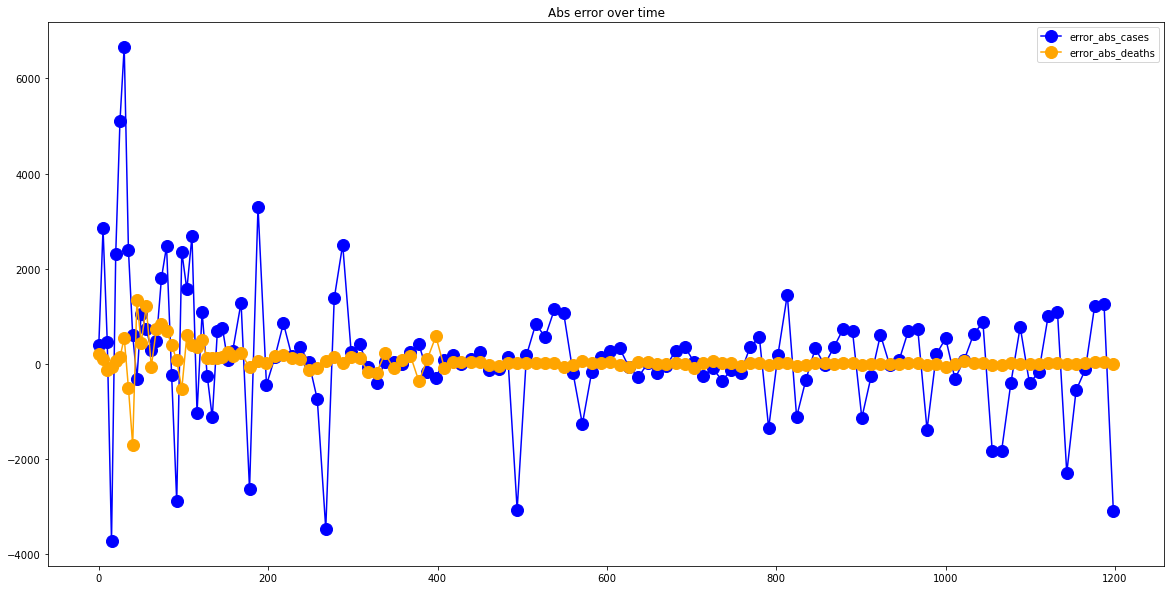

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  323.13492063492066
RMSE =  488.0762772159208
-- Italy performances for deaths --
MAE =  82.1984126984127
RMSE =  263.6871191874886


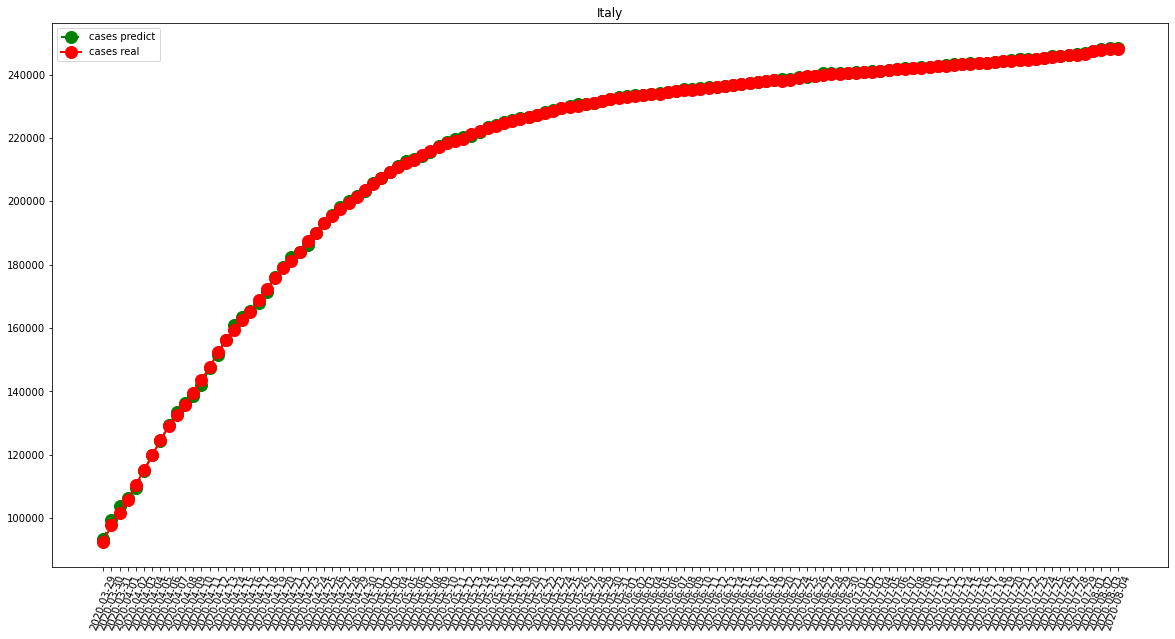

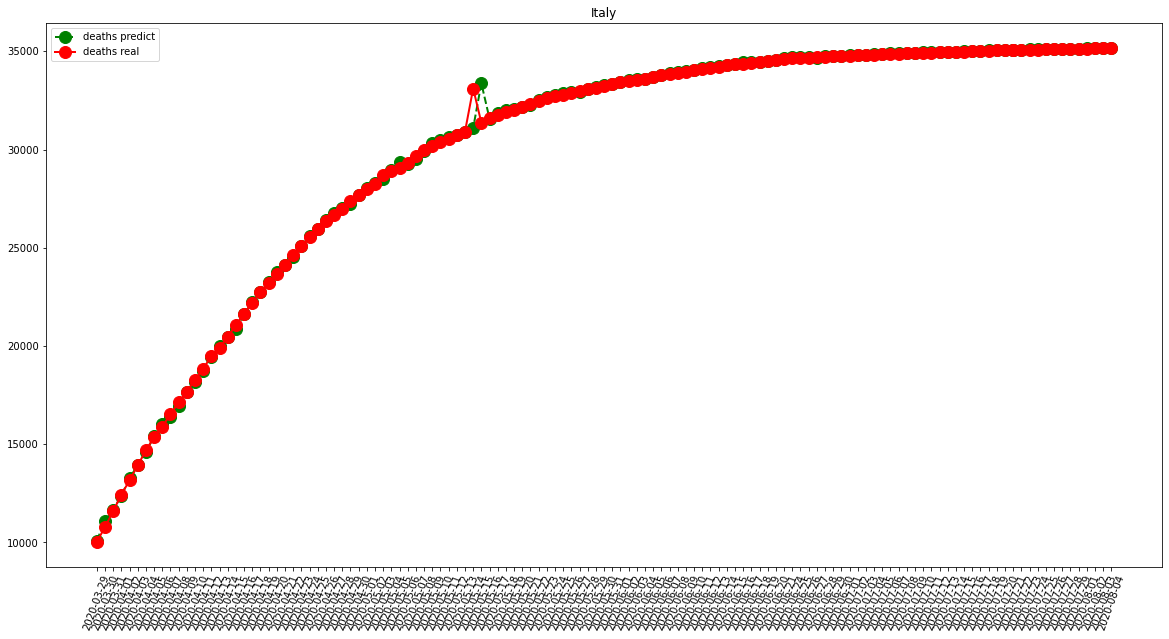

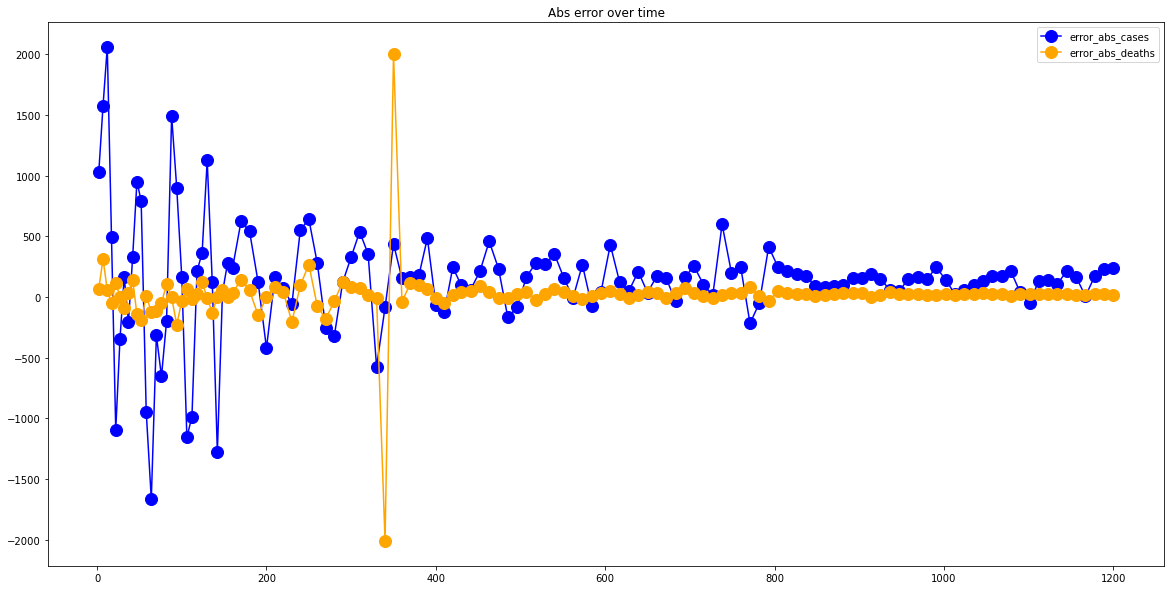

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1095.8492063492063
RMSE =  2215.9567588612504
-- Spain performances for deaths --
MAE =  146.4126984126984
RMSE =  361.6308738048908


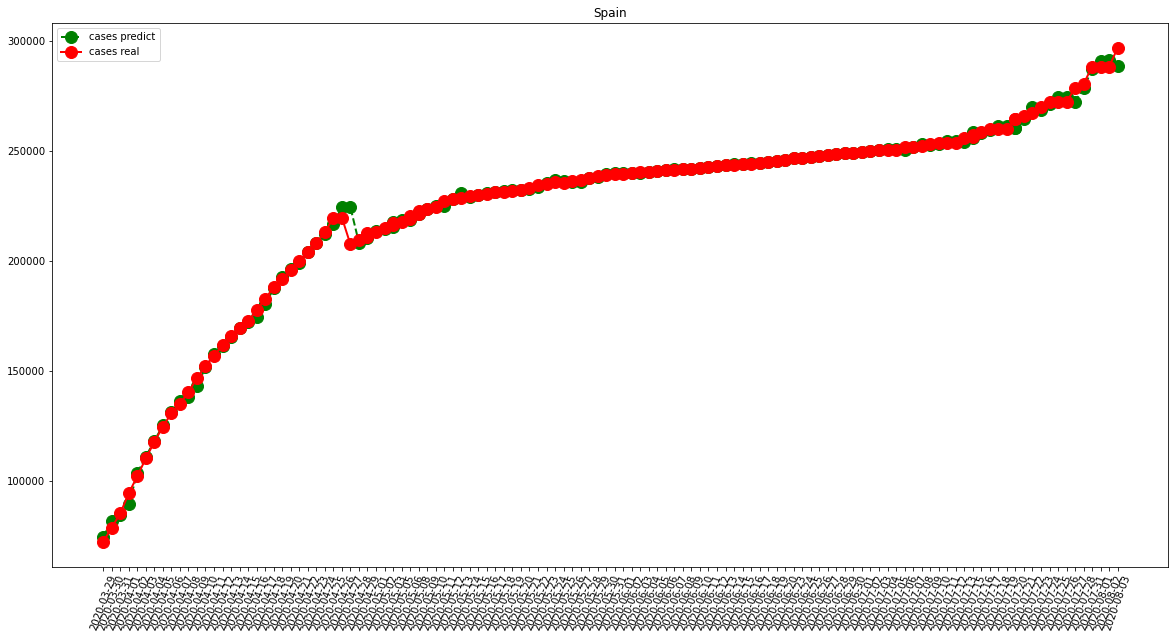

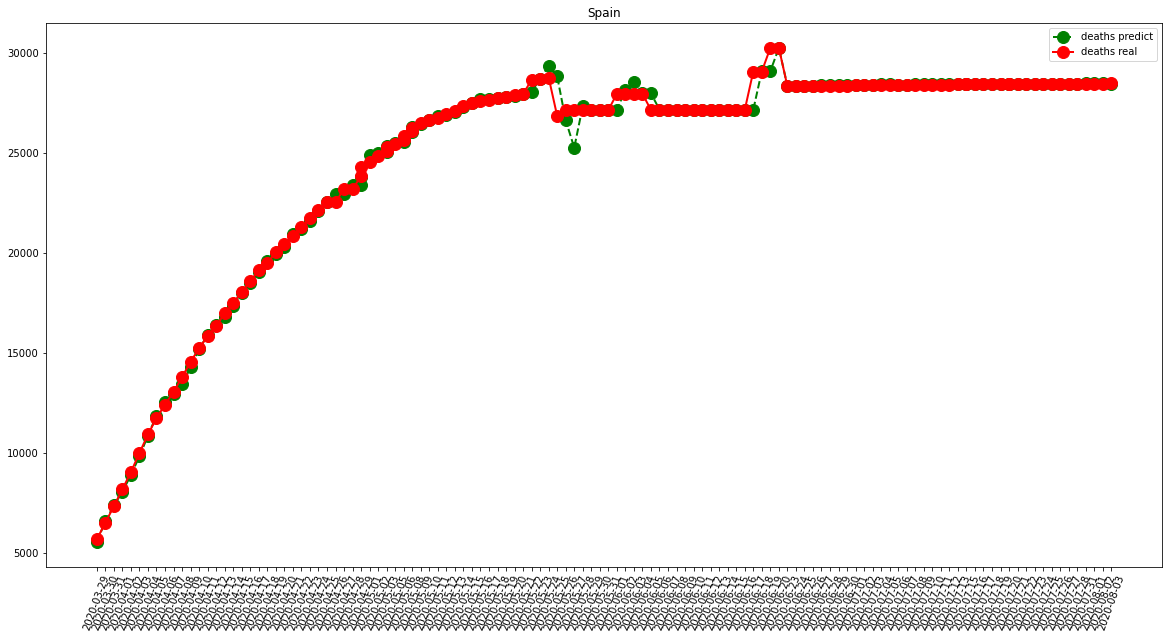

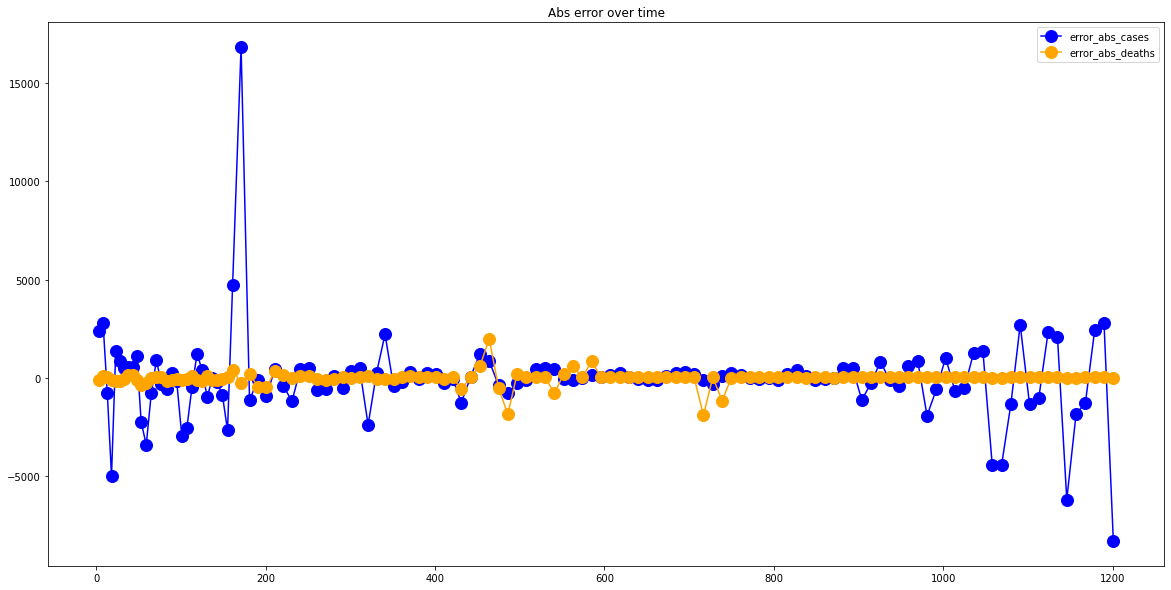

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  6376.293650793651
RMSE =  9114.739357086359
-- United States performances for deaths --
MAE =  501.531746031746
RMSE =  724.1246658870499


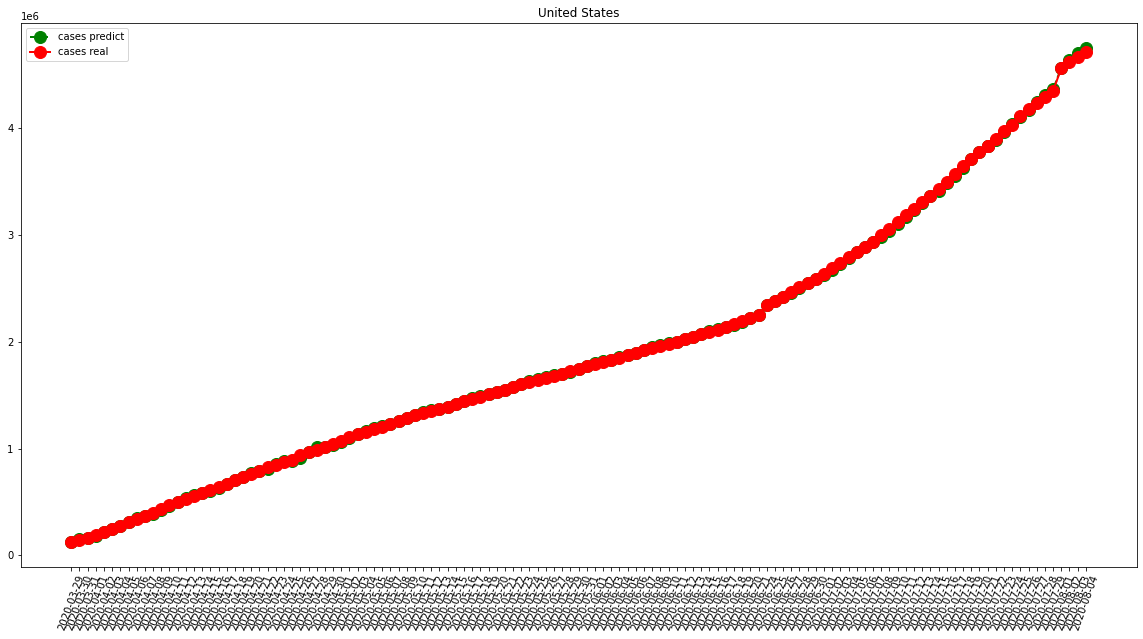

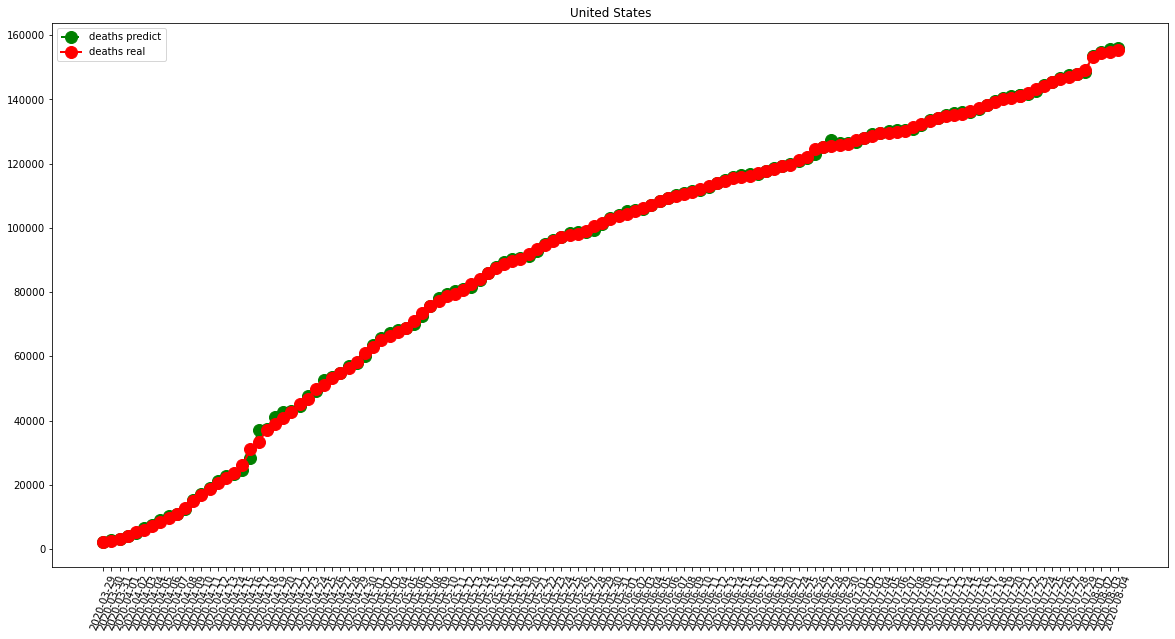

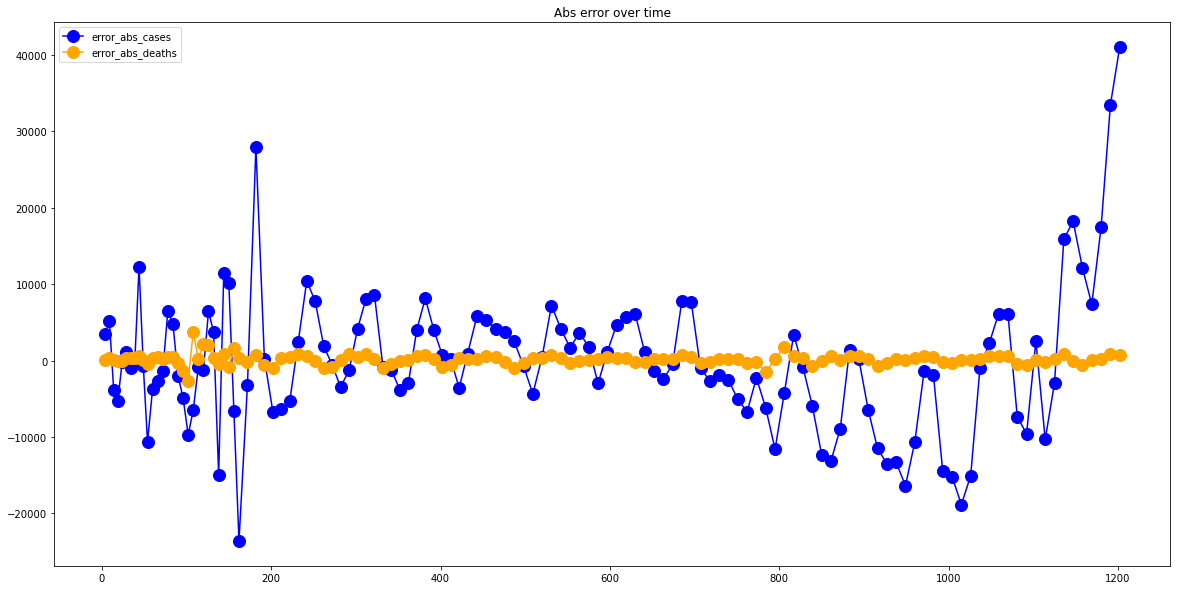

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  76.64285714285714
RMSE =  106.00310717218967
-- China performances for deaths --
MAE =  32.01587301587302
RMSE =  139.86529800955483


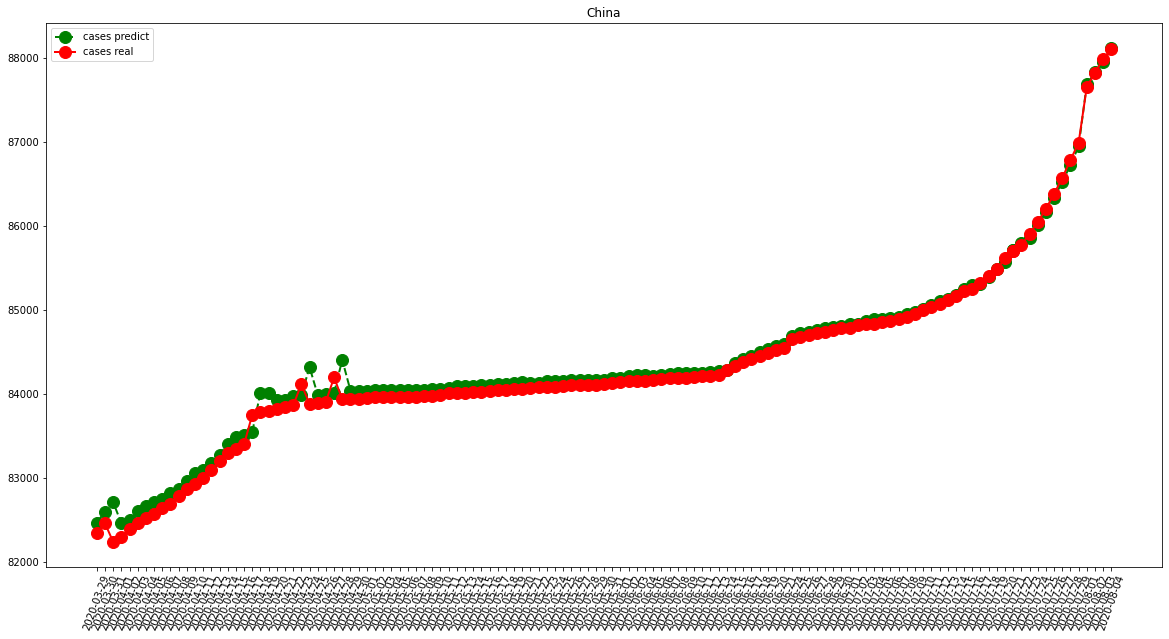

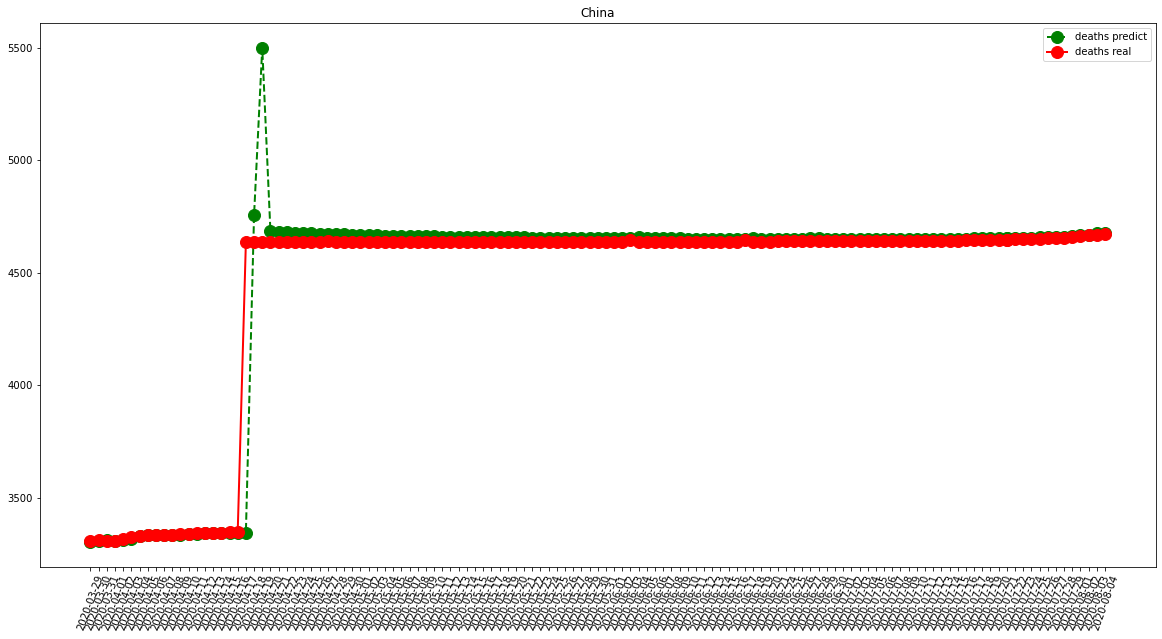

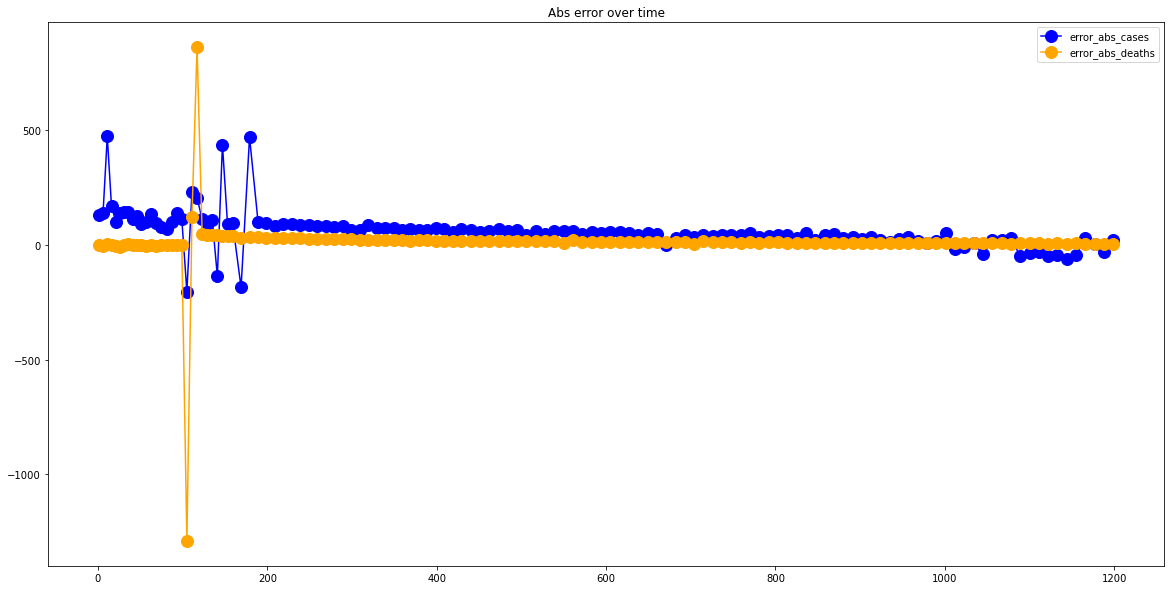

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1256.2755102040817
RMSE =  4216.162554227893
-- United Kingdom performances for deaths --
MAE =  198.01020408163265
RMSE =  496.09346346207377


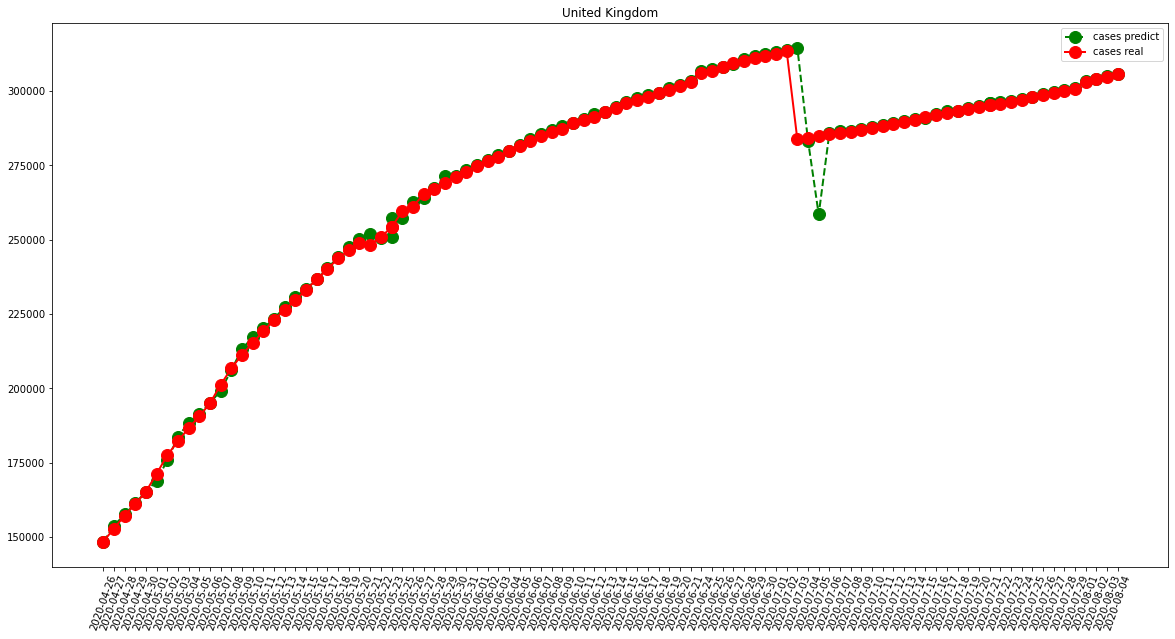

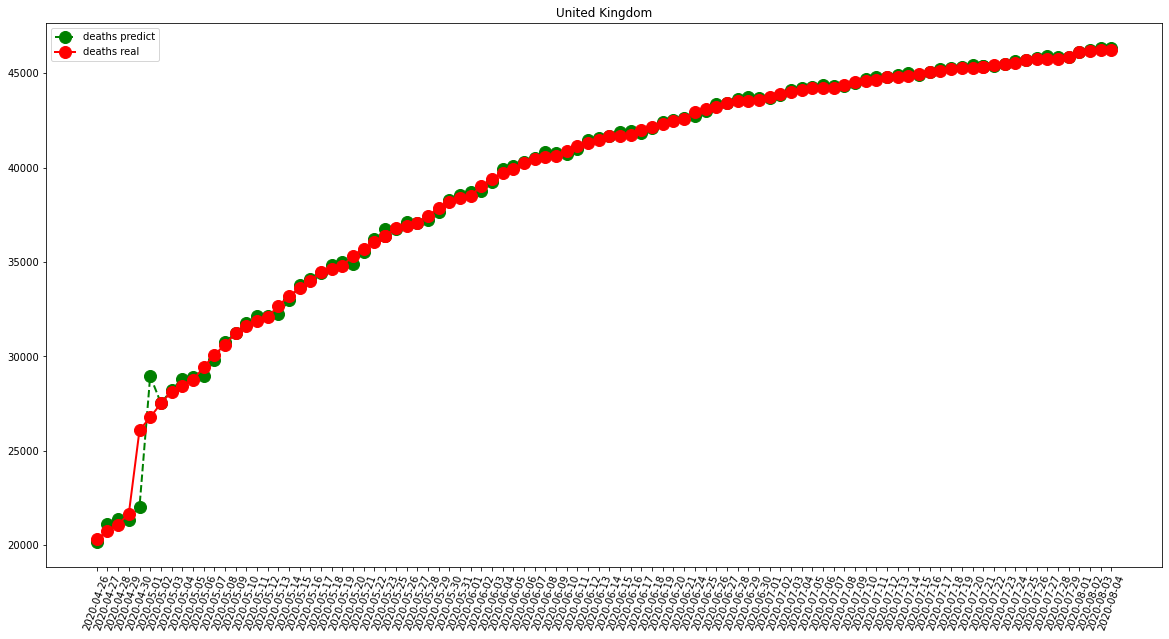

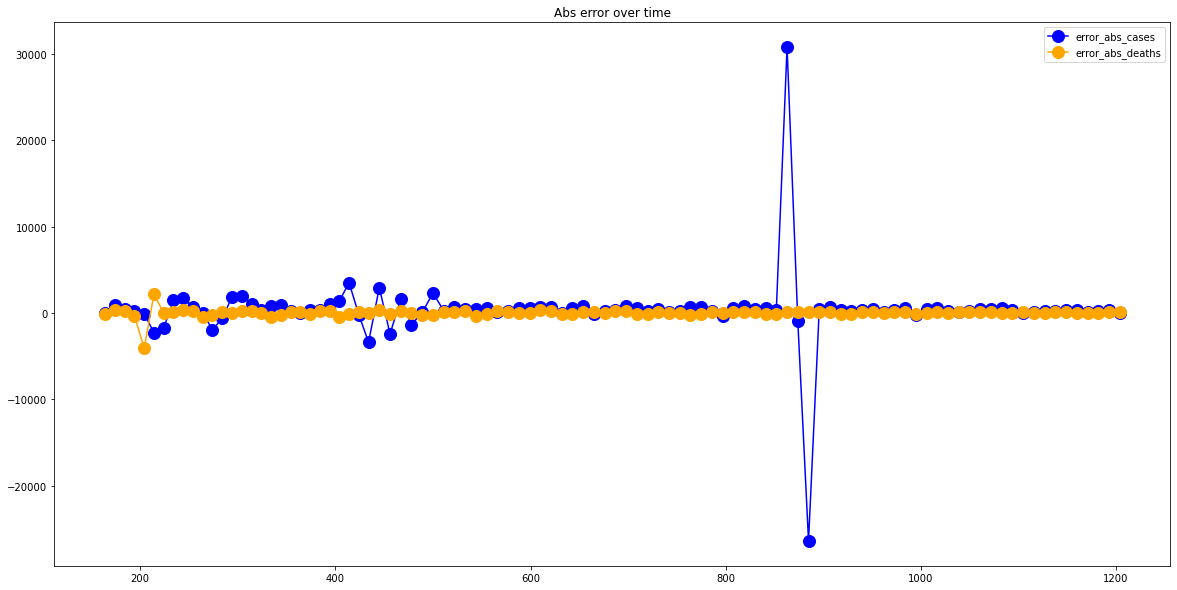

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  315.57142857142856
RMSE =  444.0734908842482
-- Germany performances for deaths --
MAE =  24.948979591836736
RMSE =  44.21226628206157


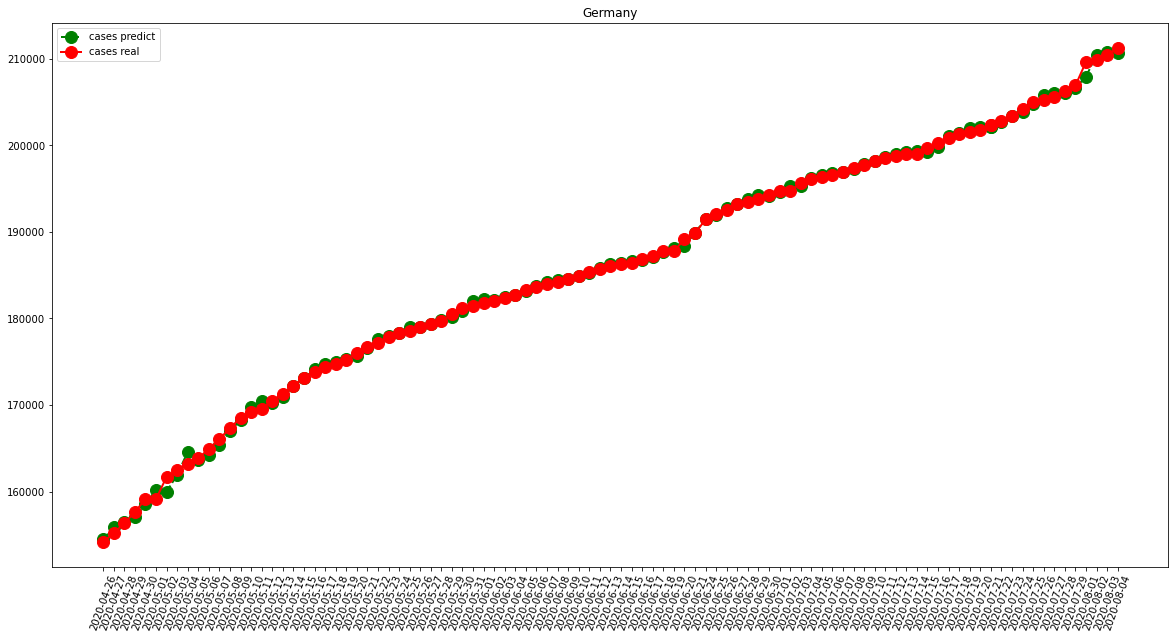

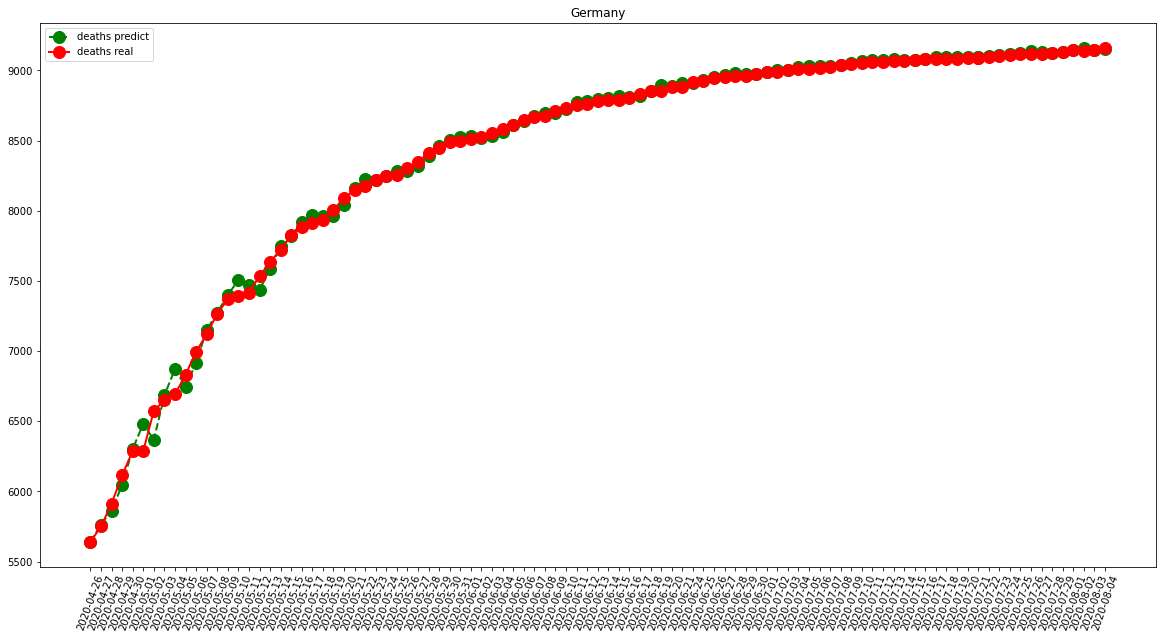

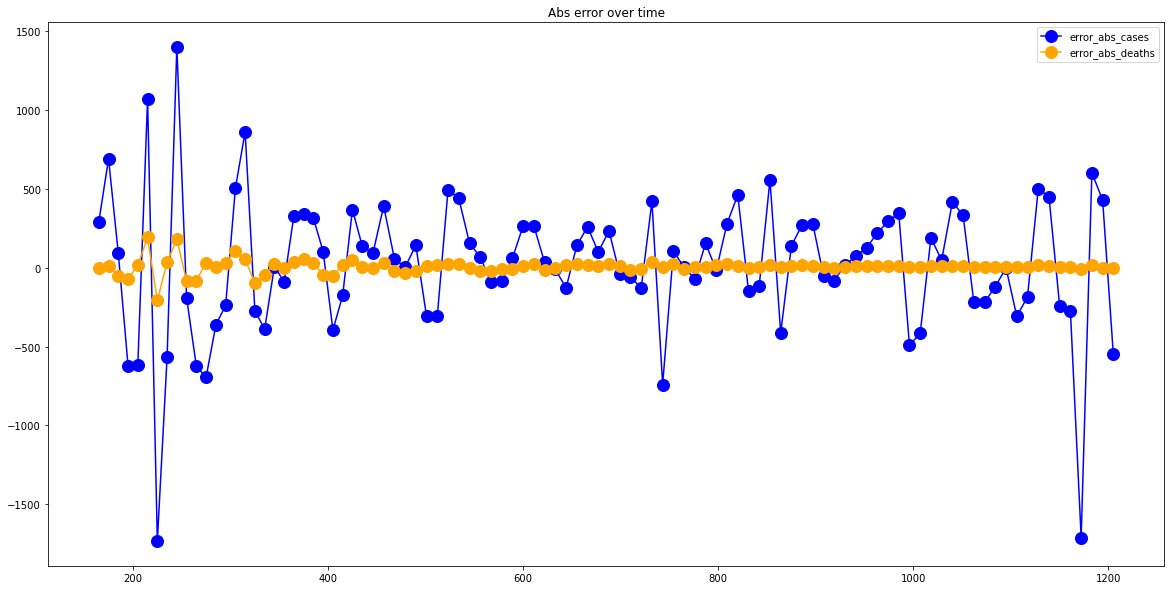

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  561.295918367347
RMSE =  873.8419683868964
-- Iran performances for deaths --
MAE =  30.540816326530614
RMSE =  68.59962218019358


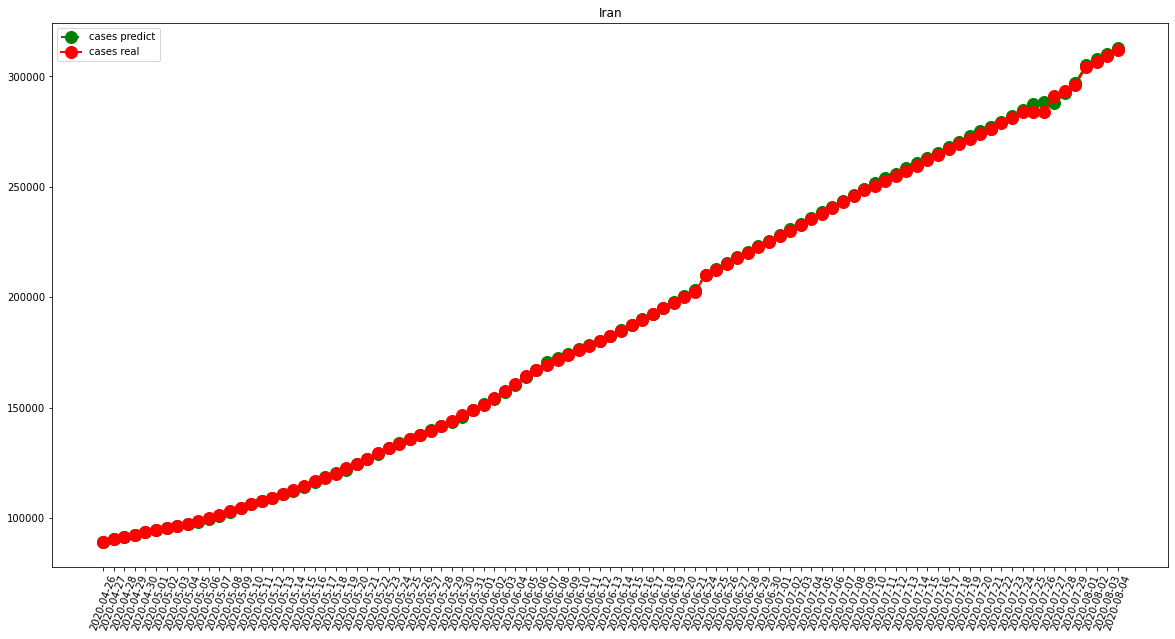

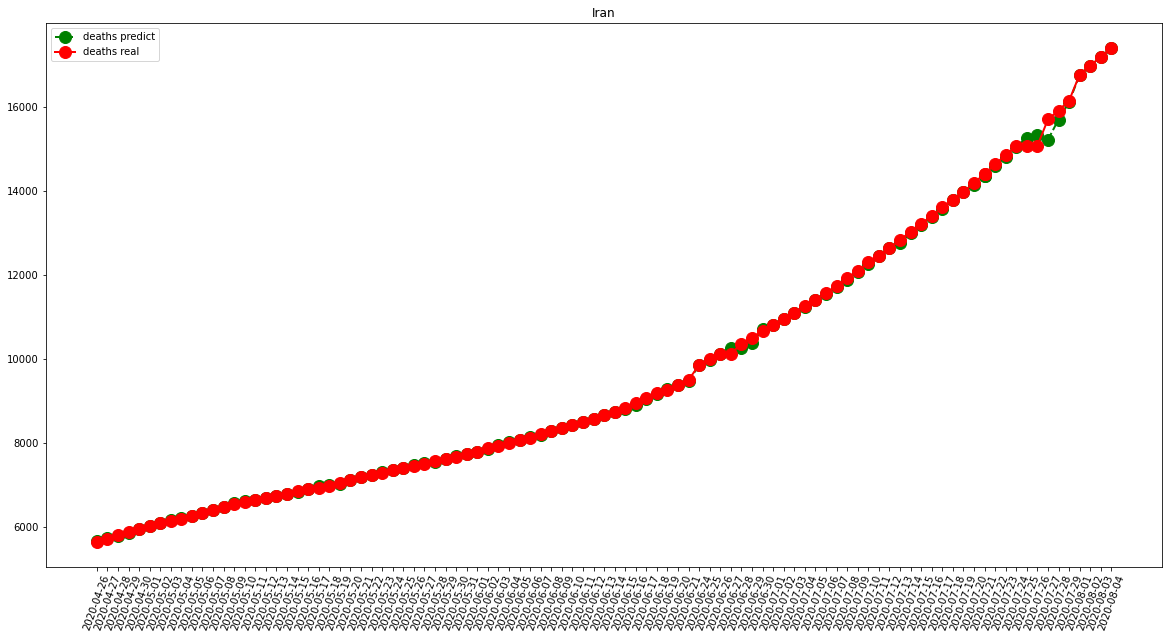

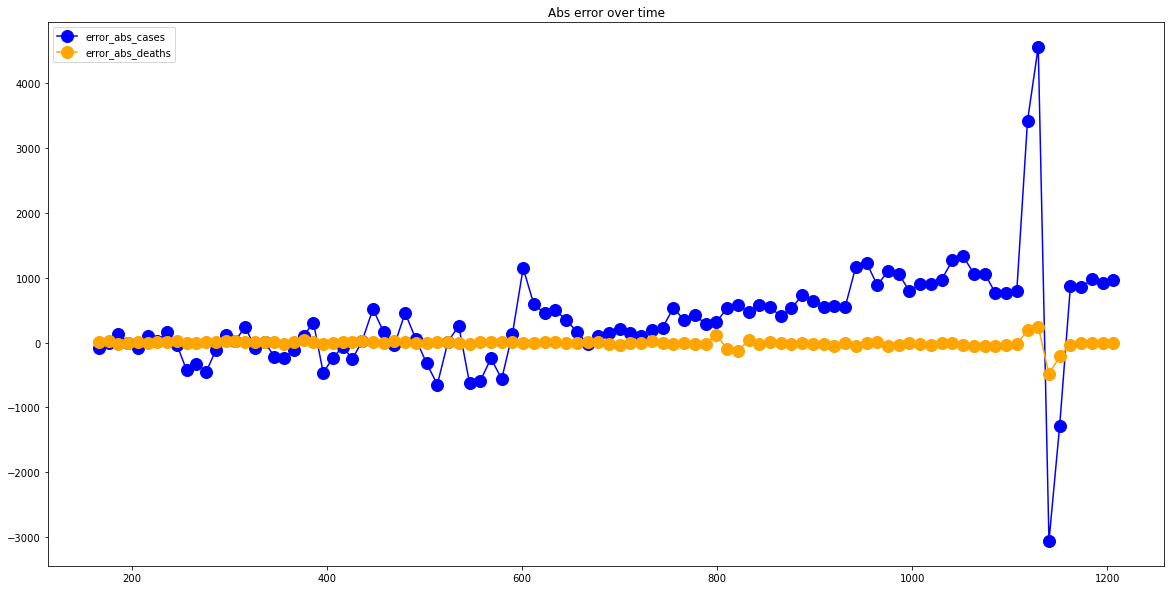

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  200.8877551020408
RMSE =  347.6830453157013
-- Turkey performances for deaths --
MAE =  19.3265306122449
RMSE =  102.54108186179701


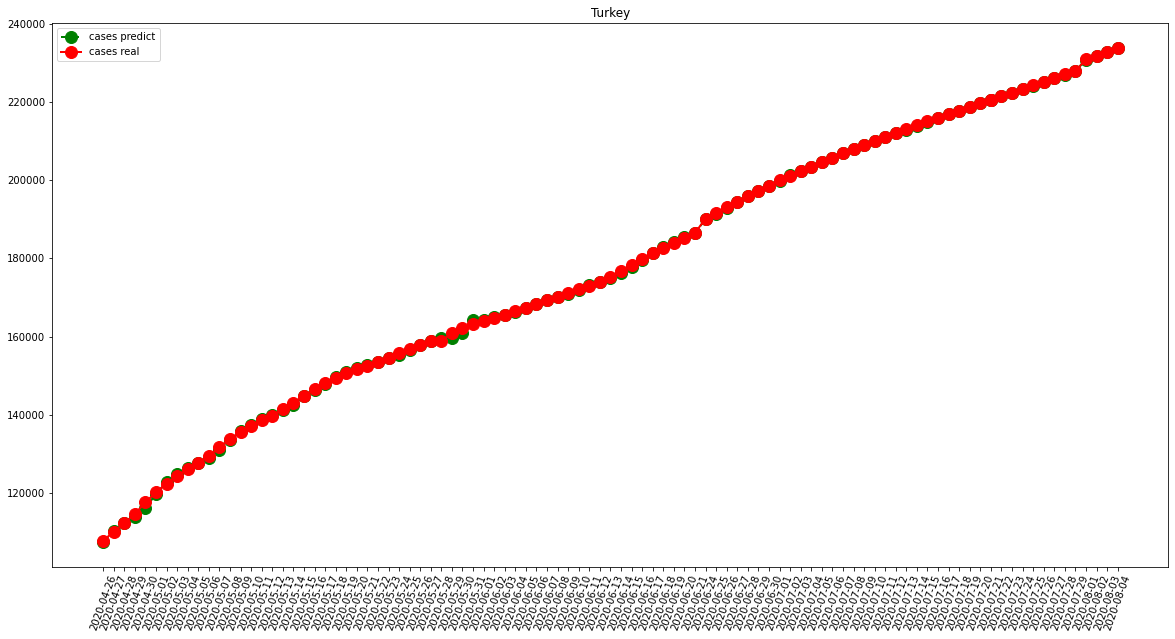

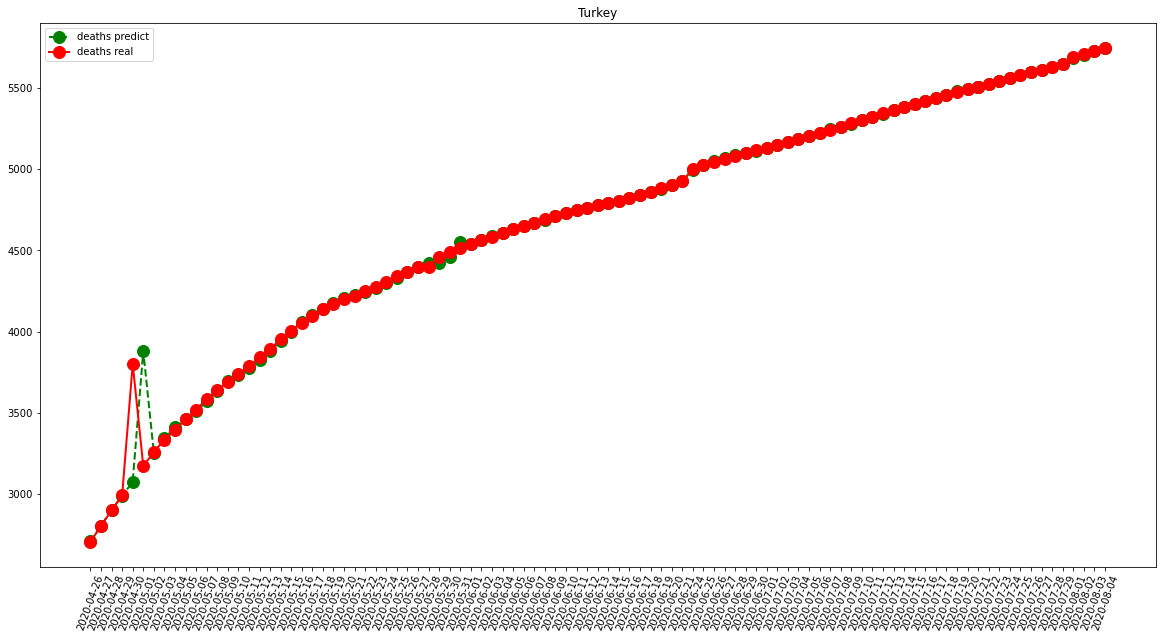

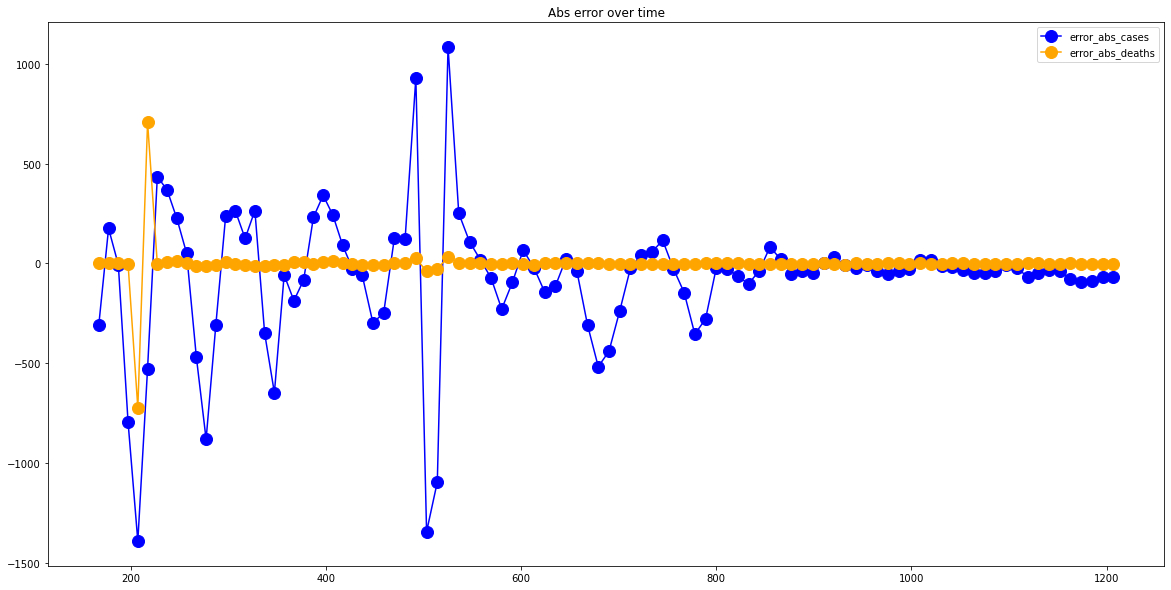

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  12243.140845070422
RMSE =  16278.34854109446
-- Brazil performances for deaths --
MAE =  406.85915492957747
RMSE =  499.7391573132054


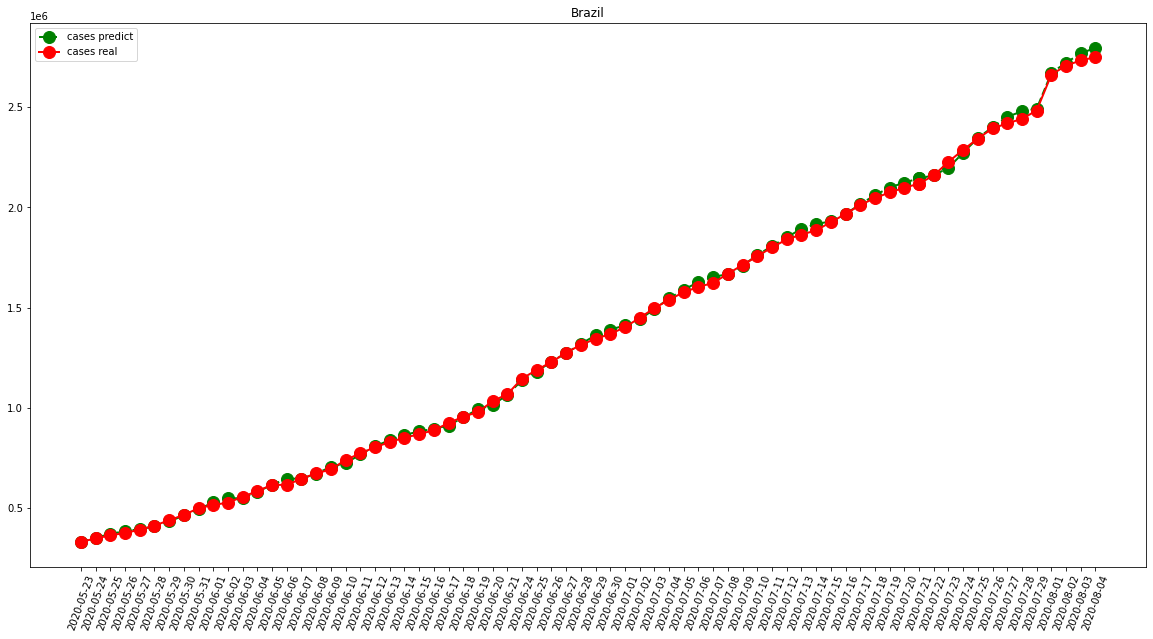

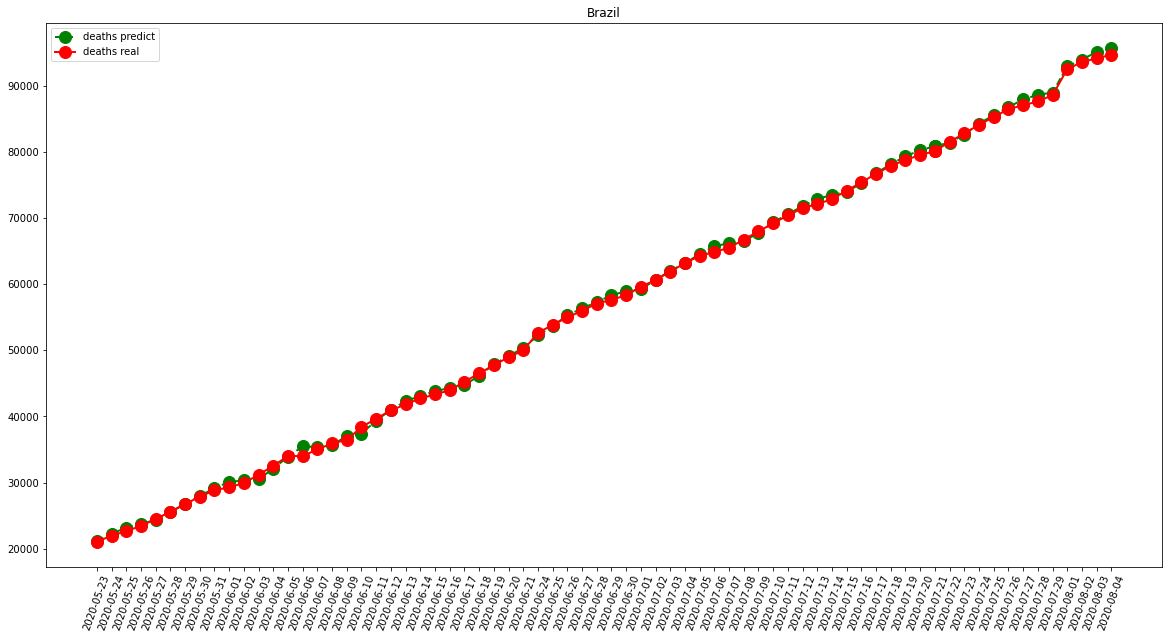

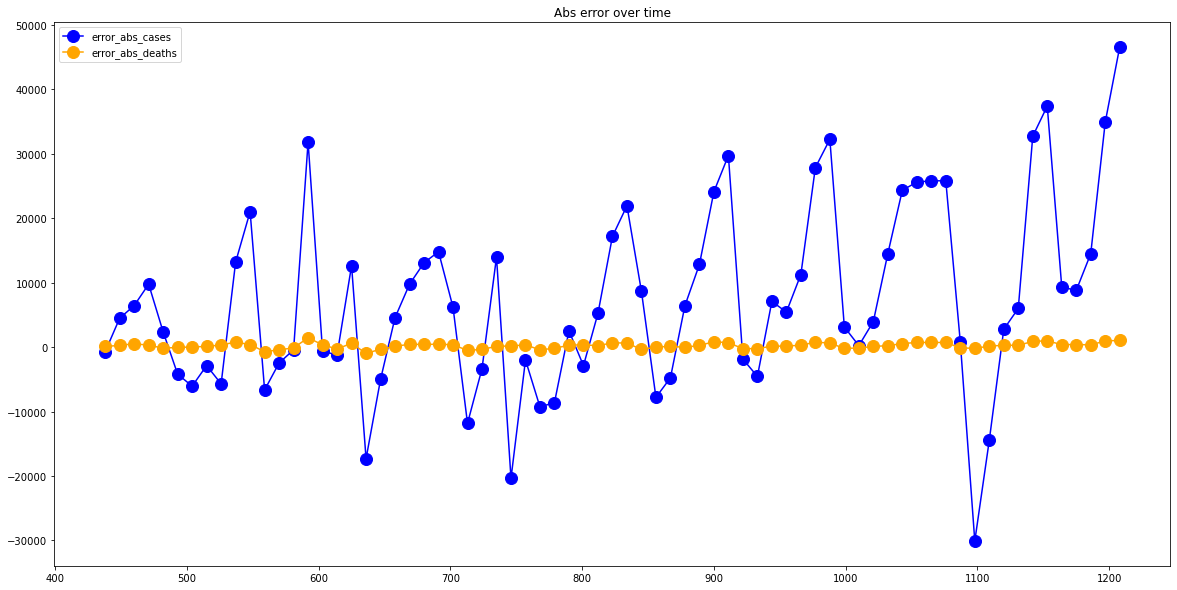

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)